# Module 4 - Algo Trading using Classification

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 4.1
Import the csv file of the stock which contained the Bollinger columns as well. 

In [1]:
#Importing some basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scikitplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("seaborn")

In [2]:
#Stock file of GMR Infrastructure Ltd (NSE: GMRINFRA) containing Bollinger Bands
df = pd.read_csv("Datasets/week3.csv")

### Query 4.1.1

Create a new column 'Call' , whose entries are: 
1. 'Buy' if the stock price is below the lower Bollinger band
2. 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
3. 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
4. 'Short' if the stock price is above the upper Bollinger band 

In [3]:
#Creating New Column 
df['Call'] = np.nan

In [4]:
for x in range(df.shape[0]):
    if df['Lower Band'][x] == 0:
        continue
    elif df['Close Price'][x] < df['Lower Band'][x]:
        df['Call'][x] = 'Buy'
    elif df['Close Price'][x] >= df['Lower Band'][x] and df['Close Price'][x] < df['Middle Band'][x]:
        df['Call'][x] = 'Hold Buy/ Liquidate Short'
    elif df['Close Price'][x] < df['Upper Band'][x] and df['Close Price'][x] >= df['Middle Band'][x]:
        df['Call'][x] = 'Hold Short/ Liquidate Buy'
    elif df['Close Price'][x] > df['Upper Band'][x]:
        df['Call'][x] = 'Short'
    else:
        pass

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Query 4.1.2
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [6]:
#Changing String value of Call to integer
unq = df['Call'].unique()
k = 0
call_dict = {}
for y in unq:
    call_dict[y] = k
    k+=1
df['Call'] = df['Call'].map(call_dict).astype(int)

In [7]:
#Splitting & Pre-processing of Data
X_train, X_test, y_train, y_test = train_test_split(df[['Close Price','Lower Band','Middle Band','Upper Band']], df['Call'], test_size=0.3, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### K Nearest Neighbors Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.9103448275862069


#### Logistic Regression

In [9]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.8896551724137931


#### Support Vector Machine - Linear

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.9241379310344827


#### Support Vector Machine - Radial basis function

In [11]:
#from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.9103448275862069


#### Navie Bayes - Gaussian

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.6


#### Navie Bayes - Bernoulli

In [13]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))
# You can not apply ComplementNB and MultinomialNB on negative Data
# We are getting low accuracy on NB because NB is suitable for Text Classification

Accuracy is 0.6068965517241379


#### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.8275862068965517


#### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print("Accuracy is {}".format(accuracy_score(y_test, y_pred, normalize=True)))

Accuracy is 0.8689655172413793


##### SVM - Linear has given best accuracy out of all the models

### Query 4.1.3

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [16]:
# As SVM - Linear has given best accuracy. So, We are using SVM - Linear for further classification.
#Importing New Stock file - IDBI Bank LTD.
df2 = pd.read_csv("Datasets/IDBI.csv")
#Adding Bollinger Bands in IDBI
X14 = df2['Close Price'].rolling(14,min_periods=14).mean()
X141 = 2*(df2['Close Price'].rolling(14,min_periods=14).std())
X142 = X14 - X141
X143 = X14 + X141 
df2['Lower Band'] = X142
df2['Middle Band'] = X14
df2['Upper Band'] = X143

In [17]:
#Checking For Equity Values
df2['Series'].unique()

array(['EQ'], dtype=object)

In [18]:
#Dropping NaN's 
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)
df2['Call'] = np.nan

In [19]:
#Training & Pre-processing
X_train = sc.fit_transform(df[['Close Price','Lower Band','Middle Band','Upper Band']])
X_test = sc.transform(df2[['Close Price','Lower Band','Middle Band','Upper Band']])
y_train = df['Call']

In [20]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
df2['Call'] = y_pred
#Invert Mapping
inv_map = {v: k for k, v in call_dict.items()}
df2 = df2.replace({"Call": inv_map})
df2['Actual_Call'] = np.nan
#Creating Column with Actual Call Value
for x in range(df2.shape[0]):
    if df2['Lower Band'][x] == 0:
        continue
    elif df2['Close Price'][x] < df2['Lower Band'][x]:
        df2['Actual_Call'][x] = 'Buy'
    elif df2['Close Price'][x] >= df2['Lower Band'][x] and df2['Close Price'][x] < df2['Middle Band'][x]:
        df2['Actual_Call'][x] = 'Hold Buy/ Liquidate Short'
    elif df2['Close Price'][x] < df2['Upper Band'][x] and df2['Close Price'][x] >= df2['Middle Band'][x]:
        df2['Actual_Call'][x] = 'Hold Short/ Liquidate Buy'
    elif df2['Close Price'][x] > df2['Upper Band'][x]:
        df2['Actual_Call'][x] = 'Short'
    else:
        pass

In [22]:
df2.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
Lower Band                0
Middle Band               0
Upper Band                0
Call                      0
Actual_Call               0
dtype: int64

In [23]:
print("Classification Report: ")
print(classification_report(df2['Actual_Call'], df2['Call']))

Classification Report: 
                           precision    recall  f1-score   support

                      Buy       1.00      0.52      0.69        23
Hold Buy/ Liquidate Short       0.95      0.89      0.92       244
Hold Short/ Liquidate Buy       0.86      1.00      0.93       198
                    Short       1.00      0.69      0.81        16

                 accuracy                           0.91       481
                macro avg       0.95      0.77      0.84       481
             weighted avg       0.92      0.91      0.91       481



##### 91% Accuracy achieved while predicting stocks for IDBI Bank Ltd

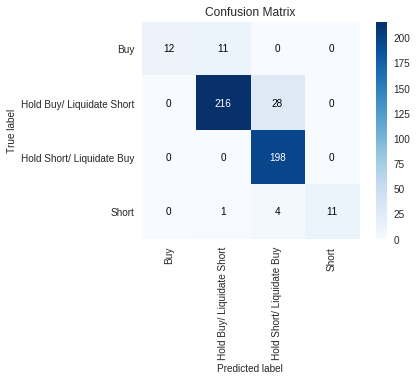

In [24]:
#confusion matrix
scikitplot.metrics.plot_confusion_matrix(df2['Actual_Call'], df2['Call'], x_tick_rotation = 90)
plt.show()

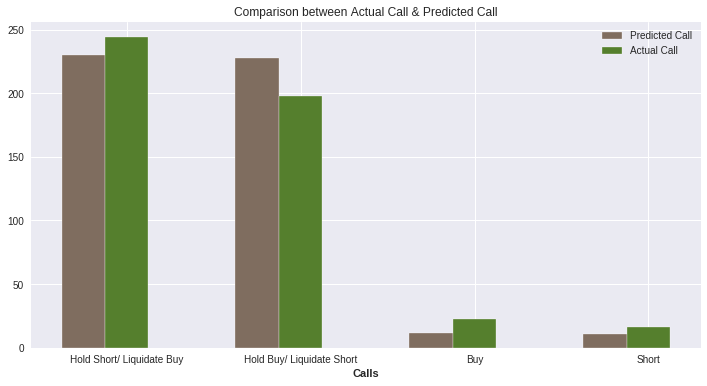

In [25]:
call = df2['Call'].value_counts()
a_call = df2['Actual_Call'].value_counts()
y = []
k =[]
for i in range(len(call)):
    y.append(call[i])
    k.append(a_call[i])
x = ["Hold Short/ Liquidate Buy","Hold Buy/ Liquidate Short","Buy","Short"]

plt.figure(figsize = (12,6))
barWidth = 0.25
 
# set height of bar
bars1 = y
bars2 = k

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Predicted Call')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Actual Call')
 
# Add xticks on the middle of the group bars
plt.xlabel('Calls', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], x)
 
# Create legend & Show graphic
plt.legend()
plt.title("Comparison between Actual Call & Predicted Call")
plt.show()